## **正则化**

是一种在训练机器学习模型时, 在损失函数中添加额外项, 来惩罚过大的模型参数, 进而限制模型复杂度避免过拟合的技术, 可以增加模型的泛化能力.

例如: 岭回归(Ridge Regression)

**原始的损失函数(均方误差)**:

$$
L_{\text{MSE}} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

**在原始Loss函数中添加一个正则项:**

$$
L_{\text{ridge}} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^{p} w_j^2
$$

原函数的目的是为了模型更好的拟合数据集, 正则项的目的是为了减小参数的大小, 从而降低模型的复杂度.其中$\lambda$ 是**正则化参数**, 用于控制正则项的强度.

正则化系数并不属于模型参数无法通过学习获得, 需要在训练前手动设置, 这种参数被称为**超参数**.

原损失函数与正则化项相互平衡, 找到最佳的模型参数

常用的正则化方法有:
- Lasso(L1) 正则化
- Ridge(L2) 正则化

#### **L1正则化(Lasso套索回归)**

Lasso通过模型参数的绝对值作为惩罚, 使得部分权重趋近于0或者等于0, 会达到特征选择效果，即模型会主动丢弃一些并不重要的特征.Lasso会有助于创建稀疏模型(许多参数为0)

$$
L_{\text{lasso}} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^{p} |w_j|
$$

当每次梯度下降的过程中会进行以下的变化:

$$
\frac{\partial L_{\text{lasso}}}{\partial w} = -2x(y - wx) + \lambda \, \text{sign}(w)
$$

$$
\text{sign}(w) =
\begin{cases}
+1, & w > 0 \\\\
-1, & w < 0
\end{cases}
$$

$$
w \leftarrow w - \eta \Big[-2x(y - wx) + \lambda \, \text{sign}(w)\Big]
$$

#### **L2正则化(Ridge回归, 岭回归)**

Ridge通过模型参数的平方作为惩罚, 更倾向于惩罚较大的参数, 并不会将参数压缩为0, 会保留所有特征, 使得所有参数变得更小使得模型更加平滑, 避免过拟合

$$
L_{\text{ridge}} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^{p} w_j^2
$$

$$
w \leftarrow w - \eta \Big[-2x(y - wx) + 2\lambda w\Big]
$$


#### **弹性网络(Elastic Net)**

$$
L_{\text{elastic}} =
\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
+ \lambda \Big[ \alpha \sum_{j=1}^{p} |w_j| + \frac{1 - \alpha}{2} \sum_{j=1}^{p} w_j^2 \Big]
$$


中和了Lasso和Ridge的正则化项, 同时具有稀疏性和稳定性


#### **同样的在[-3, 3]的范围上, 通过不使用正则, L1, L2来拟合sin(x)**

/opt/homebrew/Caskroom/miniconda/base/envs/myproject/lib/python3.14/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e+01, tolerance: 1.441e-02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniconda/base/envs/myproject/lib/python3.14/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.14036e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


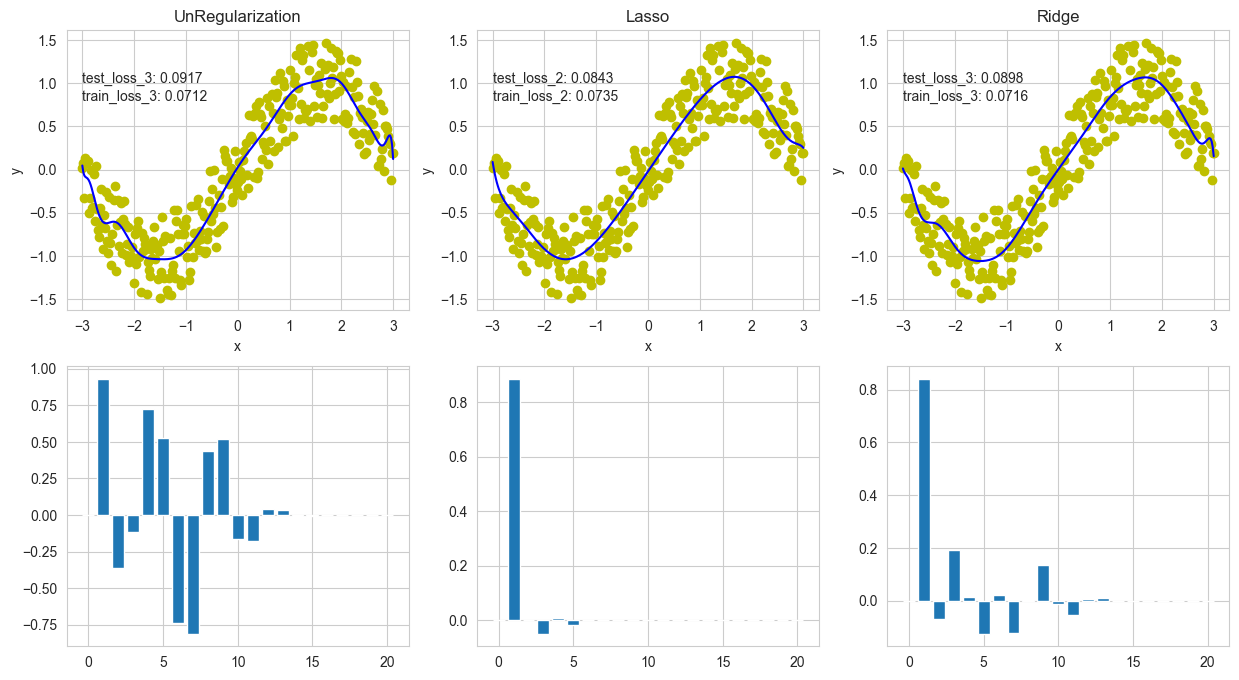

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge   # 线性回归模型, 引入套索回归, 岭回归
from sklearn.preprocessing import PolynomialFeatures    # 构建多项式特征完成多项式回归
from sklearn.model_selection import train_test_split    # 划分训练集和测试集
from sklearn.metrics import mean_squared_error  # 均方误差损失函数

"""
1. 生成数据
2. 划分训练集和测试集(验证集)
3. 定义模型(线性回归模型)
4. 训练模型
5. 预测结果, 计算损失
"""

# 1. 生成数据, 基于sinx [-1, 1]
X = np.linspace(-3, 3, 300).reshape(-1, 1)
y = np.sin(X) + np.random.uniform(-0.5, 0.5, X.shape).reshape(-1, 1)
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
ax[0, 0].scatter(X, y, c='y')
ax[0, 1].scatter(X, y, c='y')
ax[0, 2].scatter(X, y, c='y')

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (3) 过拟合数据
poly_over = PolynomialFeatures(degree=20)
X_train_3 = poly_over.fit_transform(X_train)
X_test_3 = poly_over.transform(X_test)

# 3. 定义模型
model1 = LinearRegression()
lasso = Lasso(alpha=0.01)   # 定义Lasso回归模型
ridge = Ridge(alpha=1)

# 4. 训练模型
model1.fit(X_train_3, y_train)
lasso.fit(X_train_3, y_train)
ridge.fit(X_train_3, y_train)

# 5. 预测结果, 计算损失
y_pred_1 = model1.predict(X_test_3)
test_loss_1 = mean_squared_error(y_test, y_pred_1)
train_loss_1 = mean_squared_error(y_train, model1.predict(X_train_3))

y_pred_2 = lasso.predict(X_test_3)
test_loss_2 = mean_squared_error(y_test, y_pred_2)
train_loss_2 = mean_squared_error(y_train, lasso.predict(X_train_3))

y_pred_3 = ridge.predict(X_test_3)
test_loss_3 = mean_squared_error(y_test, y_pred_3)
train_loss_3 = mean_squared_error(y_train, ridge.predict(X_train_3))


titles = ['UnRegularization', 'Lasso', 'Ridge']
for i in range(3):
    ax[0, i].set_title(titles[i])
    ax[0, i].set_xlabel('x')
    ax[0, i].set_ylabel('y')
# 画出未使用正则化过拟合结果
ax[0, 0].plot(X, model1.predict(poly_over.fit_transform(X)), c='b')
ax[0, 0].text(-3, 1, f'test_loss_3: {test_loss_1:.4f}')
ax[0, 0].text(-3, 0.8, f'train_loss_3: {train_loss_1:.4f}')
# 画出Lasso拟合结果
ax[0, 1].plot(X, lasso.predict(poly_over.fit_transform(X)), c='b')
ax[0, 1].text(-3, 1, f'test_loss_2: {test_loss_2:.4f}')
ax[0, 1].text(-3, 0.8, f'train_loss_2: {train_loss_2:.4f}')

# 画出Ridge拟合结果
ax[0, 2].plot(X, ridge.predict(poly_over.fit_transform(X)), c='b')
ax[0, 2].text(-3, 1, f'test_loss_3: {test_loss_3:.4f}')
ax[0, 2].text(-3, 0.8, f'train_loss_3: {train_loss_3:.4f}')



ax[1, 0].bar(np.arange(21), model1.coef_.reshape(-1))
ax[1, 1].bar(np.arange(21), lasso.coef_.reshape(-1))
ax[1, 2].bar(np.arange(21), ridge.coef_.reshape(-1))

plt.show()
